In [1]:
# Imports
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error \
                            , mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline



# new libraries
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential, metrics
from keras.layers import Dense, Dropout

# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)




pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings("ignore") # Prevents visual warnings and ignores them


## Data Dictionary


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale
  

In [2]:
df = pd.read_csv("Kaggle House Prices Train Data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info() # This line of code tells me the Datatypes, the column names and categories within those columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.nunique() # This line starts to show the unique values in the Dataset

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [5]:
df['Date'] = df.apply(lambda x: pd.to_datetime(f"{x['YrSold']}-{x['MoSold']}-01"), axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Date
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01


In [6]:
df = df.drop(columns=["Alley", "LandContour", "Utilities", "LandSlope", "RoofMatl", "ExterQual", "ExterCond", "BsmtQual", "OverallQual", "KitchenQual", "Functional", "FireplaceQu", "1stFlrSF", "2ndFlrSF", "GarageArea", "GarageQual", "GarageFinish", "3SsnPorch", "ScreenPorch", "MiscFeature",
"MiscVal"])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Date
0,1,60,RL,65.0,8450,Pave,Reg,Inside,CollgCr,Norm,Norm,1Fam,2Story,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,PConc,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,TA,Y,0,61,0,0,NaN,NaN,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,Reg,FR2,Veenker,Feedr,Norm,1Fam,1Story,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,CBlock,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,TA,Y,298,0,0,0,NaN,NaN,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,IR1,Inside,CollgCr,Norm,Norm,1Fam,2Story,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,PConc,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,TA,Y,0,42,0,0,NaN,NaN,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,IR1,Corner,Crawfor,Norm,Norm,1Fam,2Story,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,BrkTil,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,TA,Y,0,35,272,0,NaN,NaN,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,IR1,FR2,NoRidge,Norm,Norm,1Fam,2Story,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,PConc,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,TA,Y,192,84,0,0,NaN,NaN,12,2008,WD,Normal,250000,2008-12-01


In [7]:
df["Condition"] = df["Condition1"] + df["Condition2"] 
df = df.drop(["Condition1", "Condition2"], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Date,Condition
0,1,60,RL,65.0,8450,Pave,Reg,Inside,CollgCr,1Fam,2Story,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,PConc,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,TA,Y,0,61,0,0,NaN,NaN,2,2008,WD,Normal,208500,2008-02-01,NormNorm
1,2,20,RL,80.0,9600,Pave,Reg,FR2,Veenker,1Fam,1Story,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,CBlock,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,TA,Y,298,0,0,0,NaN,NaN,5,2007,WD,Normal,181500,2007-05-01,FeedrNorm
2,3,60,RL,68.0,11250,Pave,IR1,Inside,CollgCr,1Fam,2Story,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,PConc,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,TA,Y,0,42,0,0,NaN,NaN,9,2008,WD,Normal,223500,2008-09-01,NormNorm
3,4,70,RL,60.0,9550,Pave,IR1,Corner,Crawfor,1Fam,2Story,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,BrkTil,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,TA,Y,0,35,272,0,NaN,NaN,2,2006,WD,Abnorml,140000,2006-02-01,NormNorm
4,5,60,RL,84.0,14260,Pave,IR1,FR2,NoRidge,1Fam,2Story,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,PConc,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,TA,Y,192,84,0,0,NaN,NaN,12,2008,WD,Normal,250000,2008-12-01,NormNorm


In [8]:
def eval_regression(model, X, y, name='model'):
    """Returns a dataframe with regression metrics.  
    optional name variable can be used to name each model and/or dataset used 
    for clarity"""
    score_df = pd.DataFrame(index=[name])
    preds = model.predict(X)
    score_df.loc[name,'MAE'] = mean_absolute_error(y, preds)
    score_df.loc[name,'RMSE'] = np.sqrt(mean_squared_error(y, preds))
    score_df.loc[name,'R2'] = r2_score(y, preds)
    return score_df

def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [9]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [10]:
df.info() # This line of code gives a look at the dataset post feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   LotShape       1460 non-null   object        
 7   LotConfig      1460 non-null   object        
 8   Neighborhood   1460 non-null   object        
 9   BldgType       1460 non-null   object        
 10  HouseStyle     1460 non-null   object        
 11  OverallCond    1460 non-null   int64         
 12  YearBuilt      1460 non-null   int64         
 13  YearRemodAdd   1460 non-null   int64         
 14  RoofStyle      1460 non-null   object        
 15  Exterior1st    1460 n

## Train Test Split

In [11]:
X = df.drop(columns= "SalePrice") # This line of code Splits the Data
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

### Instantiate Scaler and Preprocessor

In [12]:
# create features for numerical features
num_selector = make_column_selector(dtype_include="number")
#instantiate scaler
scaler = StandardScaler()
# instantiate median imputer strategy
median_imputer = SimpleImputer(strategy="median")
#create pipeline for numerical 
num_pipe = make_pipeline(median_imputer,scaler)
#
number_tuple = (num_pipe, num_selector)

In [13]:
# create features for categrical features
cat_selector = make_column_selector(dtype_include="object")
#instantiate
ohe= OneHotEncoder(handle_unknown="ignore",sparse=False)
#scaler = StandardScaler()
constant_imputer = SimpleImputer(strategy="constant", fill_value="missing")
#number_tuple = (scaler, num_selector)
cat_pipe = make_pipeline(constant_imputer,ohe )
#
category_tuple = (cat_pipe,cat_selector)


In [14]:
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder="drop",
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000187DA72D640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000187DA5FD100>)],
                  verbose_feature_names_out=False)

### Fit and Transform the Data

In [15]:
X_train = preprocessor.fit_transform(X_train) # apply the preprocessor
X_test = preprocessor.transform(X_test)

In [16]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

### Look at Shape

In [17]:
X_train.shape[1] #This shows me the number of columns in my training set

230

### Build First Model

In [18]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(10, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dense(10, activation='relu', name='h2'))
# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                2310      
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 2,431
Trainable params: 2,431
Non-trainable params: 0
_________________________________________________________________


### Compile the Model Components

In [19]:
from tensorflow.keras.metrics import RootMeanSquaredError
rmse = RootMeanSquaredError(name="rmse")
reg_model.compile(optimizer= "adam", loss = "mse", metrics= [metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

### Train the Model

In [20]:
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=False)
# This gives the model data to train on and learn on update the weights and 
# and biases. This runs the data through the model. Each epoch returns the 
# training score and testing score.

### Visualize the Results

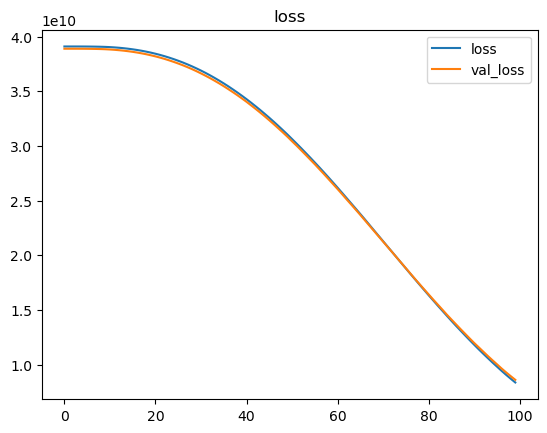

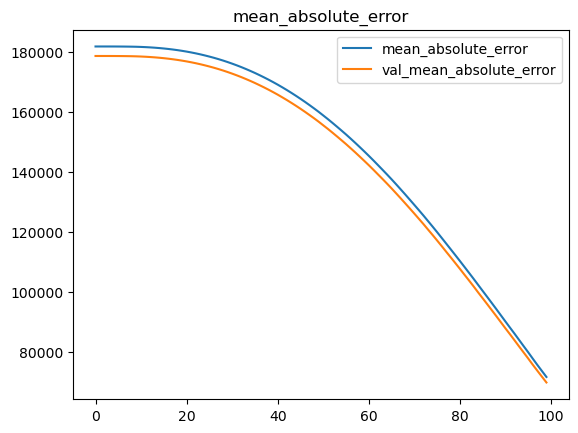

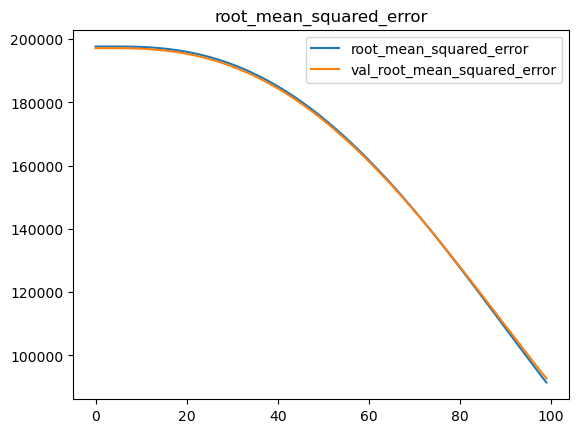

In [21]:
plot_history(history) # This line of code allows us to plot the path of training

### Evaluate the Model

In [36]:
eval_regression(y_test, y_pred, name="reg_model")

reg_model Scores
MAE: 69,883.9023 
MSE: 8,607,192,870.1266 
RMSE: 92,774.9582 
R2: -0.2287



In [23]:
y_pred = reg_model.predict(X_test)

12/12 [==============================] - 0s 957us/step


In [24]:
print(mean_squared_error(y_test, y_pred)) # actual value goes first 

8607192870.126589


In [25]:
print(np.sqrt(mean_squared_error(y_test, y_pred))) # actual value goes first 

92774.9582060083


In [26]:
print(mean_absolute_error(y_test, y_pred)) # actual value goes first 

69883.9023223459


In [27]:
print(r2_score(y_test, y_pred)) # actual value goes first 

-0.228667116014295


## Build 2nd Model

In [28]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model2 = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model2.add(Dense(12, activation='relu', input_dim=input_dim, name='h1'))
reg_model2.add(Dense(8, activation='relu', name='h2'))
# Add output layer with 1 node
reg_model2.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 12)                2772      
                                                                 
 h2 (Dense)                  (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 2,885
Trainable params: 2,885
Non-trainable params: 0
_________________________________________________________________


### Compile the Model Components

In [31]:
rmse = RootMeanSquaredError(name="rmse")
reg_model2.compile(optimizer= "adam", loss = "mse", metrics= [metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

### Train the Model

In [33]:
history2 =reg_model2.fit(X_train, y_train, 
                         validation_data = (X_test,y_test), 
                         epochs = 120, verbose=False)


### Visualize the Results

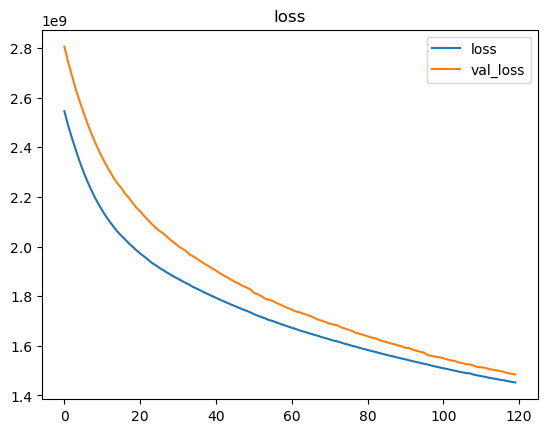

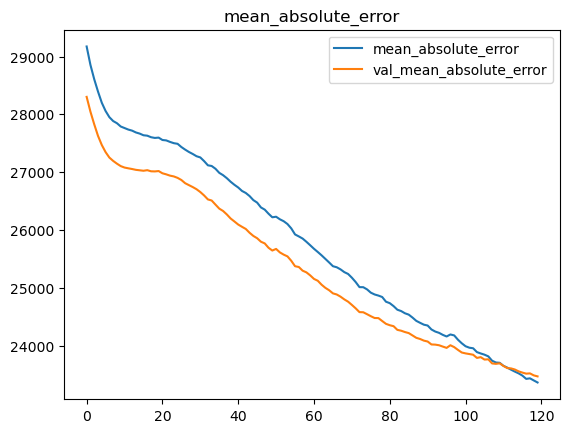

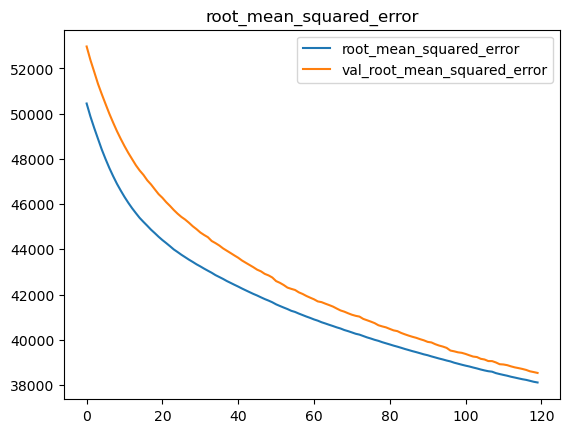

In [34]:
plot_history(history2)

In [37]:
eval_regression(y_test, y_pred, name="reg_model2")

reg_model2 Scores
MAE: 69,883.9023 
MSE: 8,607,192,870.1266 
RMSE: 92,774.9582 
R2: -0.2287



## Build 3rd Model

In [38]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model3 = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model3.add(Dense(7, activation='relu', input_dim=input_dim, name='h1'))
reg_model3.add(Dense(8, activation='relu', name='h2'))
reg_model3.add(Dense(3, activation='relu', name='h3'))
# Add output layer with 1 node
reg_model3.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 7)                 1617      
                                                                 
 h2 (Dense)                  (None, 8)                 64        
                                                                 
 h3 (Dense)                  (None, 3)                 27        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 1,712
Trainable params: 1,712
Non-trainable params: 0
_________________________________________________________________


### Compile the Model Components

In [39]:
rmse = RootMeanSquaredError(name="rmse")
reg_model3.compile(optimizer= "adam", loss = "mse", metrics= [metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

### Train the Model

In [43]:
history3 =reg_model3.fit(X_train, y_train, 
                         validation_data = (X_test,y_test), 
                         epochs = 130, verbose=False)


### Visualize the Results

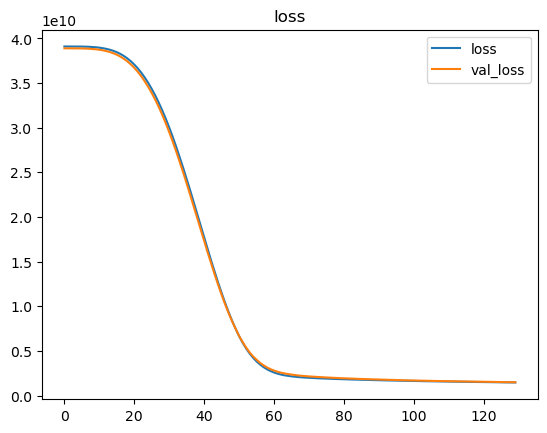

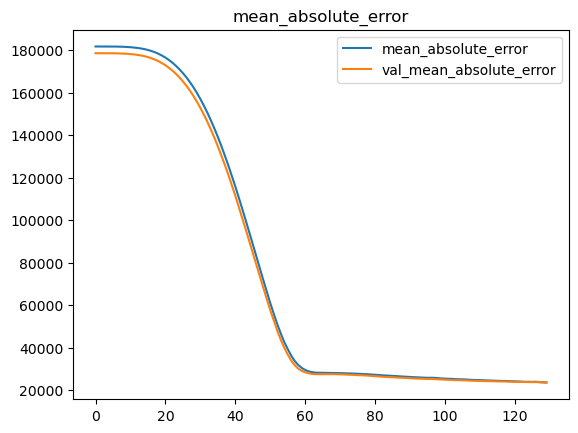

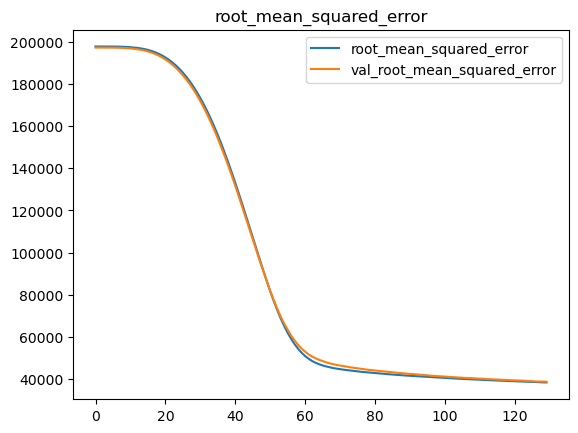

In [44]:
plot_history(history3)

In [45]:
eval_regression(y_test, y_pred, name="reg_model3")

reg_model3 Scores
MAE: 69,883.9023 
MSE: 8,607,192,870.1266 
RMSE: 92,774.9582 
R2: -0.2287



### Reg 3 Model performed the best according to the Loss Metrics.